In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def get_pareto_optimal(scores):
    size = scores.shape[0]
    ids = np.arange(size)
    pareto_front = np.ones(size, dtype=bool)
    for i in range(size):
        for j in range(size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as dominant
                pareto_front[i] = 0
                break
    # Return ids of pareto front
    return ids[pareto_front]

def get_hypervolume(pareto_front,ref_x=0):
    size = pareto_front.shape[0]
    volume = 0
    for i in range(size):
        if i==0:
            width = pareto_front[i,0]-ref_x
            volume += width*pareto_front[i,1]
        else:
            width = pareto_front[i,0]-pareto_front[i-1,0]
            volume += width*pareto_front[i,1]
        
    return volume


In [3]:
!ls ../

README.md                X_full_random.csv        b1-b21_random_virial.csv
X_frac_block.csv         b0_random_deltaG.csv     figures
X_frac_random.csv        b0_random_virial.csv     notebooks
X_full_block.csv         b1-b21_random_deltaG.csv


In [4]:
b0_dG = pd.read_csv('../b0_random_deltaG.csv')
b0_A2 = pd.read_csv('../b0_random_virial.csv')

In [5]:
b0_dG.head()

,deltaGmin,system,polymer
0,-14.362045,fe_random_batch0_0,0
1,-13.811065,fe_random_batch0_0,1
2,-14.048944,fe_random_batch0_0,2
3,-13.727992,fe_random_batch0_0,3
4,-14.289432,fe_random_batch0_0,4


In [6]:
b0_A2.head()

,polymer,system,A2_unnormalized,deltaGmin,N,A2_normalized
0,0,fe_virial_batch0,-98.035164,0,24,-0.170200
1,1,fe_virial_batch0,-68.708632,0,24,-0.119286
2,2,fe_virial_batch0,-51.421653,0,24,-0.089274
3,3,fe_virial_batch0,-12.837143,0,24,-0.022287
4,4,fe_virial_batch0,13.578276,0,24,0.023573


In [14]:
response1 = np.array(b0_A2['A2_normalized'])
response2 = -np.array(b0_dG['deltaGmin'])
# sort based on response1 values
sorted_ids = np.argsort(response1,axis=0)
response1 = response1[sorted_ids]
response2 = response2[sorted_ids]

scores = np.column_stack((response1,response2))
pareto_front_ids = get_pareto_optimal(scores)

# print(pareto_front_ids)
# pareto_front_ids = np.argsort(pareto_front_ids,axis=0)
pareto_front_scores = np.column_stack((response1[pareto_front_ids],response2[pareto_front_ids]))
hv = get_hypervolume(pareto_front_scores,ref_x=-0.2)

# hypervolume
print(hv)

6.360287589300004


In [15]:
def get_bar_widths(x,reference=0):
    '''assumes x is sorted'''
    width = np.zeros(len(x))
    for i,x_val in enumerate(x):
        if i ==0:
            width[i]= x[i]-reference
        else:
            width[i] = x[i]-x[i-1]
    return width

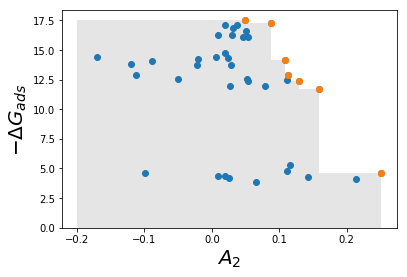

In [16]:
fig = plt.figure()
# plot all points
plt.plot(response1,response2,'o')
# plot pareto front
plt.plot(response1[pareto_front_ids],response2[pareto_front_ids],'o')

width = get_bar_widths(response1[pareto_front_ids],reference=-0.2)
# plot hypervolume
plt.bar(response1[pareto_front_ids],response2[pareto_front_ids],width = -width,alpha=0.2,align='edge',edgecolor=None,color='gray')
plt.xlabel('$A_2$',size=20)
plt.ylabel('$-{\Delta}G_{ads}$',size=20)
plt.show()